<a href="https://colab.research.google.com/github/arima35/Datasheet_Pejantara/blob/main/Copy_of_Waste_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Persiapan Dataset

mengambil dari github

In [7]:
!git clone https://github.com/arima35/Datasheet_Pejantara.git

fatal: destination path 'Datasheet_Pejantara' already exists and is not an empty directory.


Set Path Dataset

In [8]:
img_train_path = '/content/Datasheet_Pejantara/DATASET_V2/TRAIN'
img_test_path = '/content/Datasheet_Pejantara/DATASET_V2/TEST'
img_val_path = '/content/Datasheet_Pejantara/DATASET_V2/VAL'

#Import Library

In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import os
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

#Data Prepocessing

In [10]:
# Untuk data training dan validation
train_datagen = ImageDataGenerator(rescale=1.0/255)
validation_datagen = ImageDataGenerator(rescale=1.0/255)

# Load data training dan validation
train_generator = train_datagen.flow_from_directory(
    img_train_path,  # Ganti dengan path yang benar
    target_size=(150, 150),   # Ukuran gambar
    batch_size=32,
    class_mode='categorical', # Untuk klasifikasi multi kelas
    shuffle=True
)

validation_generator = validation_datagen.flow_from_directory(
    img_val_path,  # Ganti dengan path yang benar
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Untuk data test
test_datagen = ImageDataGenerator(rescale=1.0/255)

test_generator = test_datagen.flow_from_directory(
    img_test_path,  # Ganti dengan path yang benar
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 35501 images belonging to 4 classes.
Found 7606 images belonging to 4 classes.
Found 7610 images belonging to 4 classes.


#Bangun Model CNN

In [11]:
# Membangun model CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(4, activation='softmax')  # 4 kelas
])

# Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#Tambahkan Callback

In [12]:
# Stop training kalau val_loss tidak membaik
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Reduce learning rate kalau val_loss stagnan
lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    verbose=1
)

#Training Model

In [13]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1109/1109 ━━━━━━━━━━━━━━━━━━━━ 94s 79ms/step - accuracy: 0.7471 - loss: 0.6750 - val_accuracy: 0.8204 - val_loss: 0.4676
Epoch 2/10
   1/1109 ━━━━━━━━━━━━━━━━━━━━ 37s 34ms/step - accuracy: 0.8125 - loss: 0.6458

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1109/1109 ━━━━━━━━━━━━━━━━━━━━ 1s 984us/step - accuracy: 0.8125 - loss: 0.6458 - val_accuracy: 0.8182 - val_loss: 0.4914
Epoch 3/10
1109/1109 ━━━━━━━━━━━━━━━━━━━━ 78s 70ms/step - accuracy: 0.8382 - loss: 0.4261 - val_accuracy: 0.8568 - val_loss: 0.4000
Epoch 4/10
1109/1109 ━━━━━━━━━━━━━━━━━━━━ 0s 19us/step - accuracy: 0.8438 - loss: 0.2973 - val_accuracy: 0.7727 - val_loss: 0.4030
Epoch 5/10
1109/1109 ━━━━━━━━━━━━━━━━━━━━ 84s 72ms/step - accuracy: 0.8814 - loss: 0.3183 - val_accuracy: 0.8720 - val_loss: 0.3530
Epoch 6/10
1109/1109 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8125 - loss: 0.3351 - val_accuracy: 0.8636 - val_loss: 0.3825
Epoch 7/10
1109/1109 ━━━━━━━━━━━━━━━━━━━━ 131s 70ms/step - accuracy: 0.9147 - loss: 0.2288 - val_accuracy: 0.8759 - val_loss: 0.3756
Epoch 8/10
1109/1109 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.9688 - loss: 0.1057 - val_accuracy: 0.8182 - val_loss: 0.3792
Epoch 9/10
1109/1109 ━━━━━━━━━━━━━━━━━━━━ 79s 70ms/step - accuracy: 0.9488 - loss: 0.1393 -

#Evaluasi Model

In [14]:
# Evaluasi model pada data test
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


238/238 ━━━━━━━━━━━━━━━━━━━━ 13s 55ms/step - accuracy: 0.8950 - loss: 0.3274
Test Loss: 0.47545284032821655
Test Accuracy: 0.8700394034385681


In [15]:
# Prediksi data test
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)  # Ambil kelas dengan probabilitas tertinggi

# Mapping kelas
class_labels = list(test_generator.class_indices.keys())
print("Class Labels:", class_labels)

# Cek hasil prediksi dengan label asli
true_classes = test_generator.classes
for i in range(len(predicted_classes)):
    print(f"Gambar {i+1}: Prediksi = {class_labels[predicted_classes[i]]}, Asli = {class_labels[true_classes[i]]}")


Streaming output truncated to the last 5000 lines.
Gambar 2611: Prediksi = ANORGANIC, Asli = ANORGANIC
Gambar 2612: Prediksi = ANORGANIC, Asli = ANORGANIC
Gambar 2613: Prediksi = ANORGANIC, Asli = ANORGANIC
Gambar 2614: Prediksi = ANORGANIC, Asli = ANORGANIC
Gambar 2615: Prediksi = ANORGANIC, Asli = ANORGANIC
Gambar 2616: Prediksi = ANORGANIC, Asli = ANORGANIC
Gambar 2617: Prediksi = ORGANIC, Asli = ANORGANIC
Gambar 2618: Prediksi = ANORGANIC, Asli = ANORGANIC
Gambar 2619: Prediksi = ANORGANIC, Asli = ANORGANIC
Gambar 2620: Prediksi = ORGANIC, Asli = ANORGANIC
Gambar 2621: Prediksi = ANORGANIC, Asli = ANORGANIC
Gambar 2622: Prediksi = ANORGANIC, Asli = ANORGANIC
Gambar 2623: Prediksi = ANORGANIC, Asli = ANORGANIC
Gambar 2624: Prediksi = ANORGANIC, Asli = ANORGANIC
Gambar 2625: Prediksi = ANORGANIC, Asli = ANORGANIC
Gambar 2626: Prediksi = ANORGANIC, Asli = ANORGANIC
Gambar 2627: Prediksi = ANORGANIC, Asli = ANORGANIC
Gambar 2628: Prediksi = ANORGANIC, Asli = ANORGANIC
Gambar 2629: Pred

#Visualisasi Hasil Training

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 663ms/step


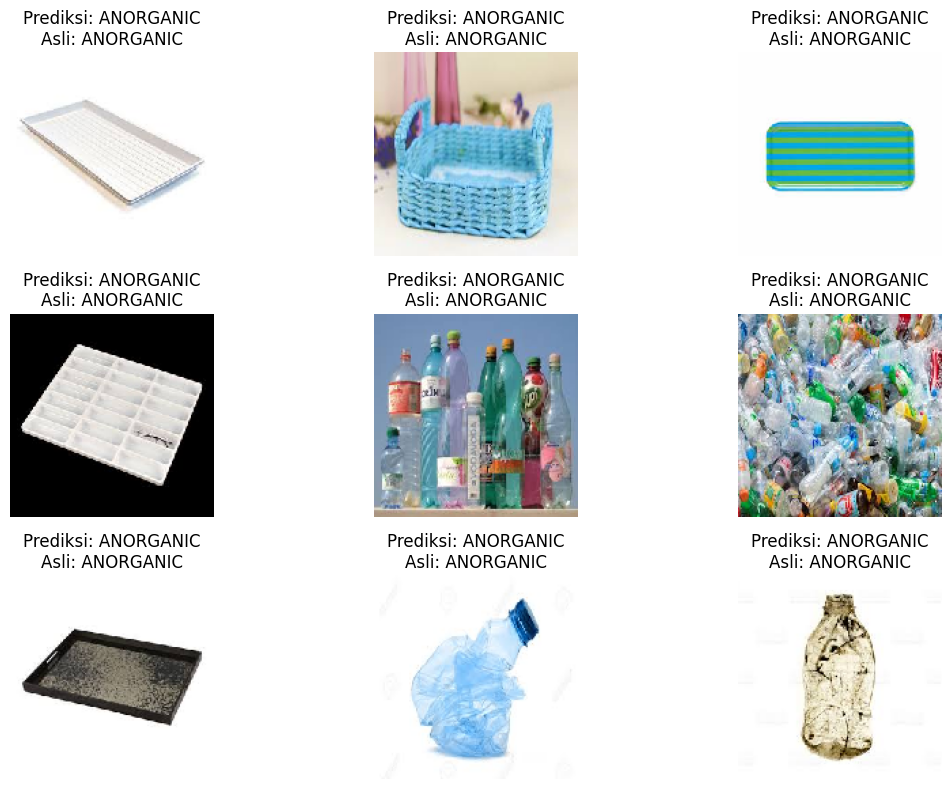

In [16]:
# Ambil batch gambar dan label asli dari test_generator
images, labels = next(test_generator)

# Prediksi untuk batch ini
batch_predictions = model.predict(images)
batch_predicted_classes = np.argmax(batch_predictions, axis=1)

# Plot beberapa gambar dengan prediksinya
plt.figure(figsize=(12, 8))
for i in range(9):  # Menampilkan 9 gambar pertama
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i])
    plt.title(f"Prediksi: {class_labels[batch_predicted_classes[i]]}\nAsli: {class_labels[np.argmax(labels[i])]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


Menyimpan Model yang Sudah Dilatih

In [17]:
model.save('klasifikasi_sampah.h5')